In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook
from sklearn.metrics import mean_squared_error, log_loss, accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import imageio
from IPython.display import HTML
import seaborn as sns

In [2]:
data, label = make_circles(n_samples=1000, noise=0.2, factor=0.15)
print(data.shape, label.shape)

(1000, 2) (1000,)


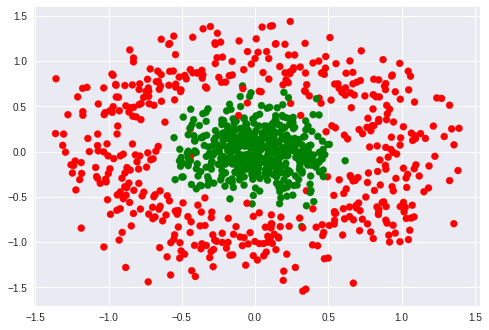

In [3]:
#Visualize data
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])
plt.scatter(data[:,0], data[:,1], c=label, cmap=my_cmap)

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(data, label, stratify=label,  random_state=0)
print(X_train.shape, Y_train.shape)

(750, 2) (750,)


# Neuralnet Class

In [0]:
class NeuralNet:
  
  def __init__(self):
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.w7 = np.random.randn()
    self.w8 = np.random.randn()
    self.w9 = np.random.randn()
    self.w10 = np.random.randn()
    self.b1 = 1
    self.b2 = 1
    self.b3 = 1
    self.b4 = 1
    self.b5 = 1
    
  def sigmoid(self, x):
    return(1.0/(1.0 + np.exp(-x)))
  
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return(np.array(Y_pred))
  
  def predict_h1(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h1)
    return(np.array(Y_pred))
  
  def predict_h2(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h2)
    return(np.array(Y_pred))
  
  def predict_h3(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h3)
    return(np.array(Y_pred))
  
  def predict_h4(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h4)
    return(np.array(Y_pred))
  
  def predict_h5(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h5)
    return(np.array(Y_pred))
  
  def forward_pass(self, x):
    self.x1, self.x2 =x
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.h1 = self.sigmoid(self.a1)
    self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
    self.h2 = self.sigmoid(self.a2)
    self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
    self.h3 = self.sigmoid(self.a3)
    self.a4 = self.w7*self.h1 + self.w8*self.h2 + self.b4
    self.h4 = self.sigmoid(self.a4)
    self.a5 = self.w9*self.h3 + self.w10*self.h4 + self.b5
    self.h5 = self.sigmoid(self.a5)
    return(self.h5)
  
  def grad(self, x, y):
      self.forward_pass(x)
      self.da5 = (self.h5-y)*self.h5*(1-self.h5)
      self.da3 = self.da5*self.w9*self.h4*(1-self.h4)
      self.da4 = self.da5*self.w10*self.h4*(1-self.h4)
      self.dx1 = (self.w10*self.h4*(1-self.h4)*self.w7) + (self.w9*self.h3*(1-self.h3)*self.w5)
      self.dx2 = (self.w10*self.h4*(1-self.h4)*self.w5) + (self.w9*self.h3*(1-self.h3)*self.w6)
      self.dx3 = self.da5*self.dx1*self.h1*(1-self.h1)
      self.dx4 = self.da5*self.dx2*self.h2*(1-self.h2)
      
      self.dw9 = self.da5*self.h3
      self.dw10 = self.da5*self.h4
      self.db5 = self.da5
      
      self.dw5 = self.da3*self.h1
      self.dw6 = self.da3*self.h2
      self.db3 = self.da3
      
      self.dw7 = self.da4*self.h1
      self.dw8 = self.da4*self.h2
      self.db4 = self.da4
      
      self.dw1 = self.dx3*self.x1
      self.dw2 = self.dx3*self.x2
      self.db1 = self.dx3
      
      self.dw3 = self.dx4*self.x1
      self.dw4 = self.dx4*self.x2
      self.db2 = self.dx4
      
    
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialize=True, display_loss=True, display_weights=True):
    
    if(initialize):
      self.w1 = np.random.randn()
      self.w2 = np.random.randn()
      self.w3 = np.random.randn()
      self.w4 = np.random.randn()
      self.w5 = np.random.randn()
      self.w6 = np.random.randn()
      self.w7 = np.random.randn()
      self.w8 = np.random.randn()
      self.w9 = np.random.randn()
      self.w10 = np.random.randn()
      self.b1 = 0
      self.b2 = 0
      self.b3 = 0
      self.b4 = 0
      self.b5 = 0
    
    if(display_loss):
      loss={}
      
    for epoch in tqdm_notebook(range(epochs), total=epochs, unit='epoch'):
      
      dw1, dw2, dw3, dw4, dw5, dw6, dw7, dw8, dw9, dw10, db1, db2, db3, db4, db5 = [0]*15
      for x,y in zip(X,Y):
        self.grad(x,y)
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        dw7 += self.dw7
        dw8 += self.dw8
        dw9 += self.dw9
        dw10 += self.dw10
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3
        db4 += self.db4
        db5 += self.db5
        
      if(display_loss):
        Y_pred = self.predict(X)
        loss[epoch] = mean_squared_error(Y_pred, Y)
        
      if(display_weights):
        weight_matrix = np.array([[0,0,self.b5, self.w9, self.w10,0],
                                [self.b3, self.w5, self.w6, self.w7, self.w8,self.b4],
                                [self.b1, self.w1, self.w2, self.w3, self.w4, self.b2]])
        weight_matrices.append(weight_matrix)
      
      m = X.shape[0]
      m=1
      self.w1 -= learning_rate*dw1/m
      self.w2 -= learning_rate*dw2/m
      self.w3 -= learning_rate*dw3/m
      self.w4 -= learning_rate*dw4/m
      self.w5 -= learning_rate*dw5/m
      self.w6 -= learning_rate*dw6/m
      self.w7 -= learning_rate*dw7/m
      self.w8 -= learning_rate*dw8/m
      self.w9 -= learning_rate*dw9/m
      self.w10 -= learning_rate*dw10/m
      self.b1 -= learning_rate*db1/m
      self.b2 -= learning_rate*db2/m
      self.b3 -= learning_rate*db3/m
      self.b4 -= learning_rate*db4/m
      self.b5 -= learning_rate*db5/m
      
    if(display_loss):
      plt.plot(loss.values())
      plt.title('Loss graph')
      plt.xlabel('epochs')
      plt.ylabel('MSE')

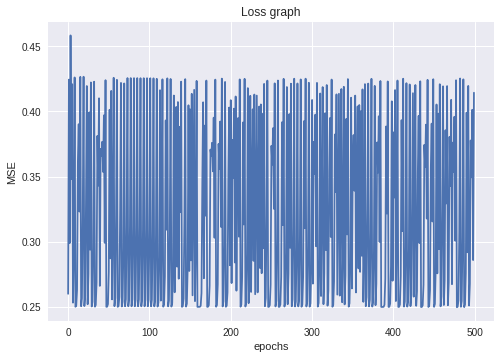

In [69]:
weight_matrices=[]
nnet = NeuralNet()
nnet.fit(X_train, Y_train, epochs=500, learning_rate=0.1)

In [70]:
Y_train_pred = nnet.predict(X_train)
Y_train_pred_binarized = (Y_train_pred>0.5).astype('int').ravel()
Y_test_pred = nnet.predict(X_test)
Y_test_pred_binarized = (Y_test_pred>0.5).astype('int').ravel()
train_acc = accuracy_score(Y_train_pred_binarized, Y_train)
test_acc  = accuracy_score(Y_test_pred_binarized,  Y_test)
print(train_acc, test_acc)

0.5 0.5


In [0]:
def plot_heatmap(epoch):
  fig = plt.figure(figsize=(10,1))
  sns.heatmap(weight_matrices[epoch], cmap=my_cmap, annot=True)
  plt.title('Weights at epoch: '+str(epoch))
  
  fig.canvas.draw()
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
  image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
  
  return image

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


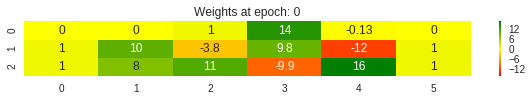

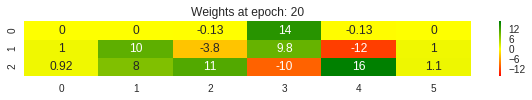

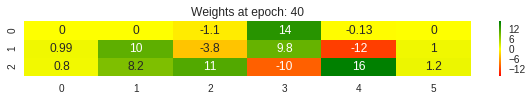

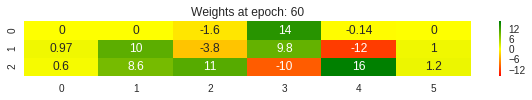

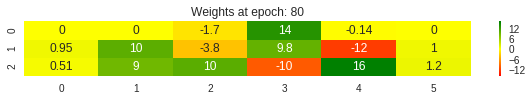

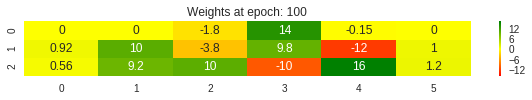

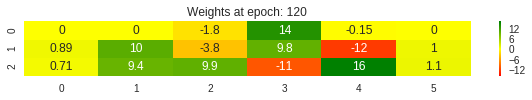

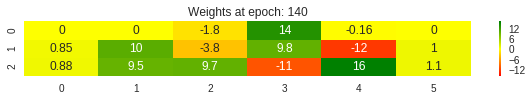

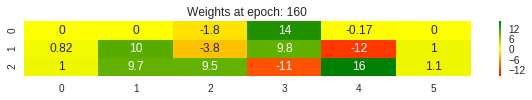

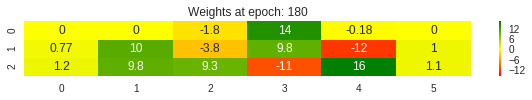

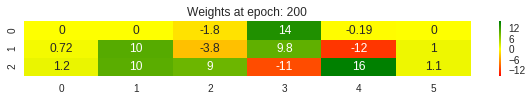

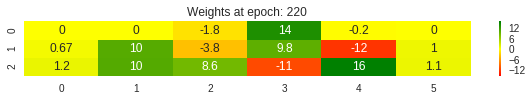

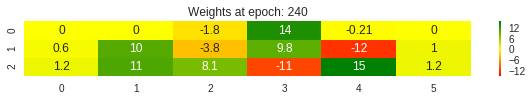

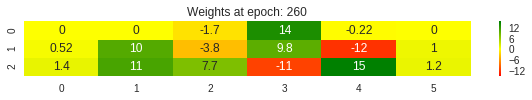

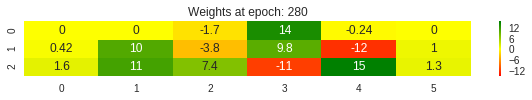

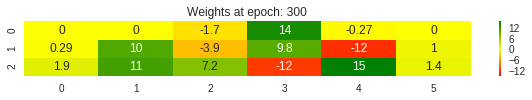

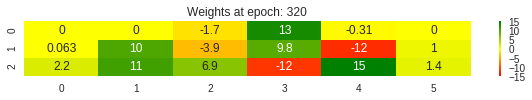

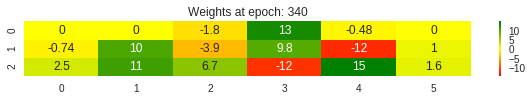

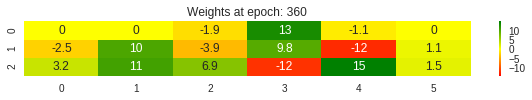

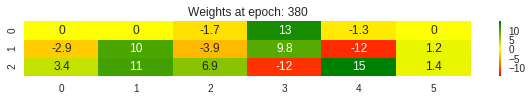

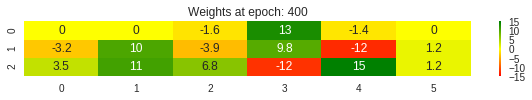

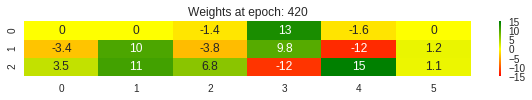

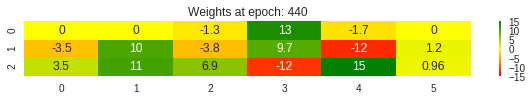

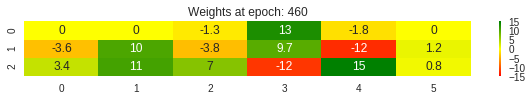

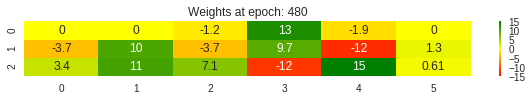

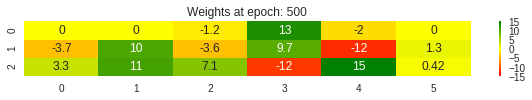

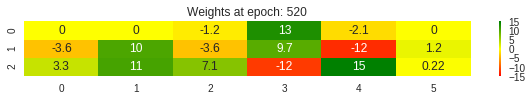

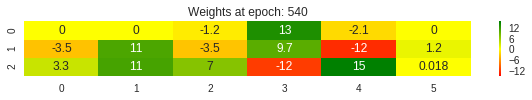

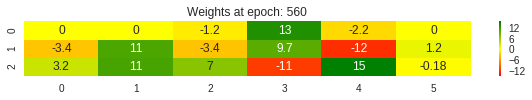

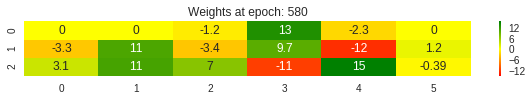

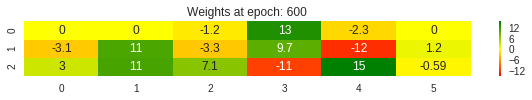

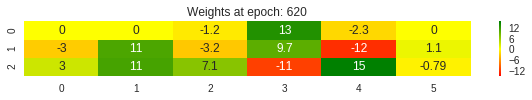

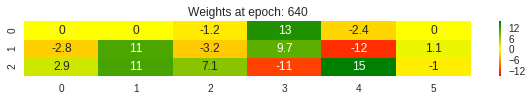

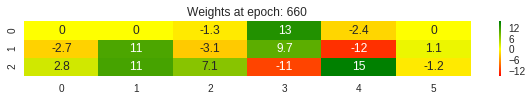

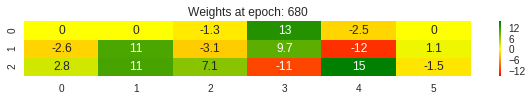

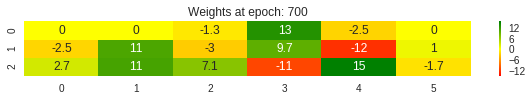

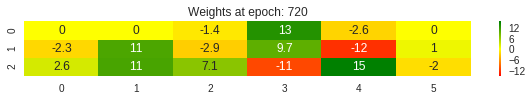

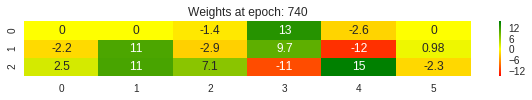

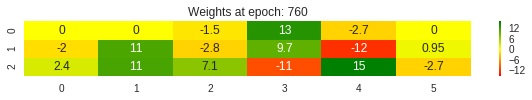

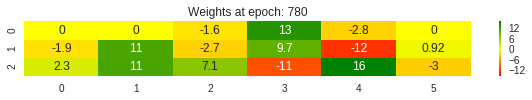

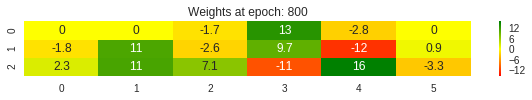

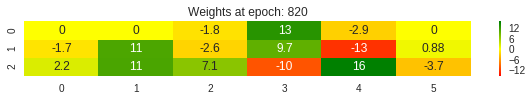

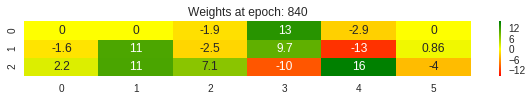

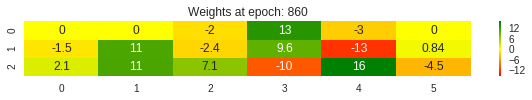

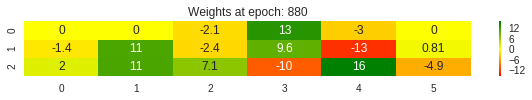

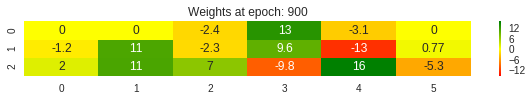

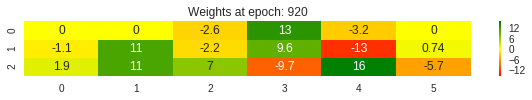

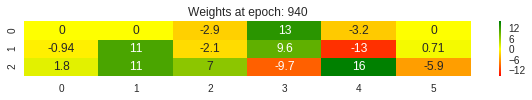

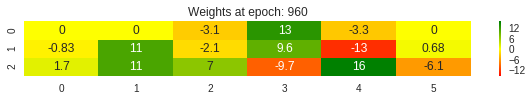

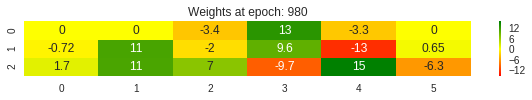

In [54]:
epochs=500
imageio.mimsave('./weights.gif', [plot_heatmap(epoch) for epoch in range(0, len(weight_matrices), len(weight_matrices)//50)], fps=1)

In [0]:
#Plotting sigmoid neuron learnings
def make_meshgrid(x1, x2):
  x1_min, x1_max = x1.min(), x1.max()
  x2_min, x2_max = x2.min(), x2.max()
  h=0.2
  xx1, xx2  = np.meshgrid(np.arange(x1_min,x1_max,h),np.arange(x2_min, x2_max, h))
  return(xx1, xx2)
  
def plot_contourf(xx1, xx2, ax, predict, **params):
  yy = nnet.predict(np.c_[xx1.ravel(), xx2.ravel()])
  yy =yy.reshape(xx1.shape)
  plt.contourf(xx1, xx2, yy, **params)
  return
  
def plot_boundary():
  xx1, xx2 = make_meshgrid(X_train[:,0], X_train[:,1])
  predict_fns = [nnet.predict_h1, nnet.predict_h2, nnet.predict_h3, nnet.predict_h4, nnet.predict_h5]
  i=1
  for predict in predict_fns:
    fig, ax = plt.subplots(figsize=(10,5))
    plot_contourf(xx1, xx2, ax, predict, cmap=my_cmap, alpha=0.2)
    plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap=my_cmap, alpha=0.8)
    ax.set_title('Learning by neuron'+str(i))
    ax.set_xlim(xx1.min(), xx1.max())
    ax.set_ylim(xx2.min(), xx2.max())
    ax.set_xlabel('xx1')
    ax.set_ylabel('xx2')
    i+=1

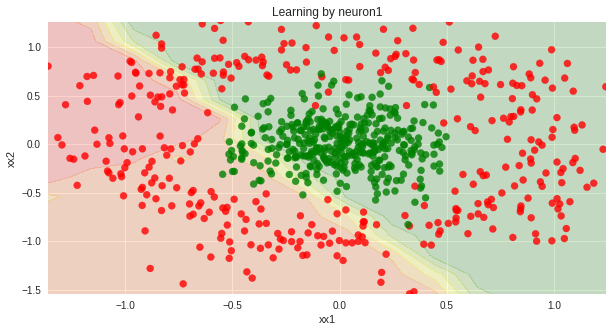

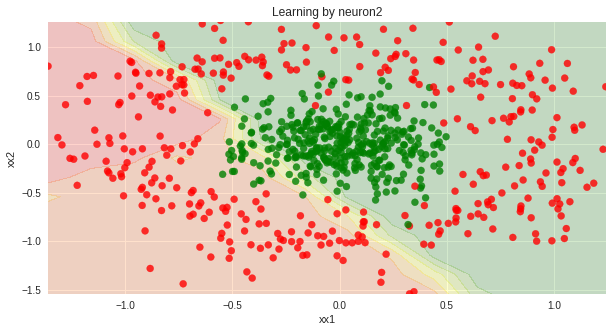

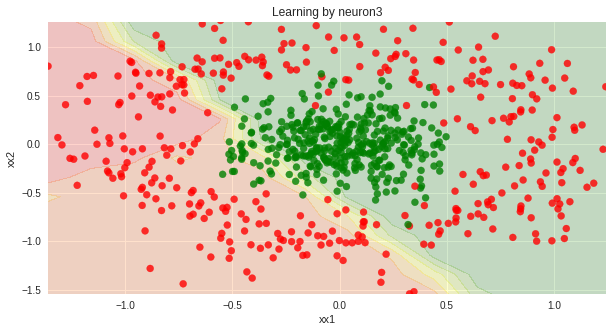

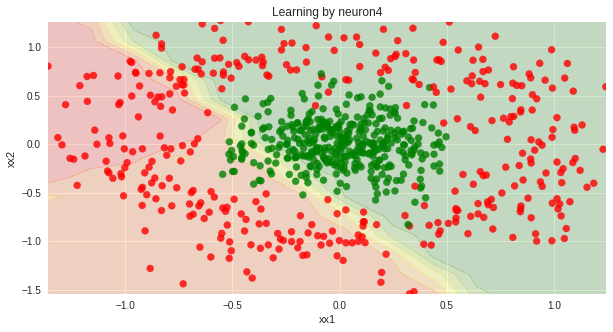

In [62]:
plot_boundary()